<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
# LOGISTIC REGRESSION


##  Bank Marketing


**Abstract:** 
The data is related with __direct marketing campaigns__ (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a __term deposit (variable y)__.

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the __product (bank term deposit)__ would be __('yes')__ or __('no')__ subscribed. 

###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
 

### Import the dataset

In [2]:
import pandas as pd
bank = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/bank.csv')
bank.head() 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,29,admin.,single,university.degree,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
2,50,management,married,university.degree,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,31,admin.,married,high.school,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4,32,admin.,single,high.school,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


In [3]:
bank[bank.pdays == 999].previous.unique()

array([0, 1, 2, 5, 3, 4], dtype=int64)

In [4]:
bank[(bank.pdays == 999) & (bank.previous > 0) ].shape

(1025, 21)

In [5]:
bank.shape

(10297, 21)

In [6]:
bank[bank.pdays == 999].poutcome.unique()

array(['nonexistent', 'failure'], dtype=object)

### Check the columns present in the dataset

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Check the shape of Dataset

In [8]:
bank.shape 

(10297, 21)

### Check the descriptive statistics of the dataset

In [9]:
bank.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000
mean,40.080606,261.388268,2.561134,963.609692,0.171506,0.077256,93.574206,-40.445780,3.621923,5166.850442
std,10.472190,263.722874,2.827084,184.098592,0.496992,1.576732,0.577502,4.622221,1.734170,72.492914
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,327.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,94.000000,3643.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# Describe using Sweetviz

import sweetviz as sv

report = sv.analyze(bank)
report.show_html("bank_term-deposit_eda.html")

                                             |                                             | [  0%]   00:00 ->…

Report bank_term-deposit_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Check the info of the dataset

In [11]:
bank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10297 entries, 0 to 10296
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10297 non-null  int64  
 1   job             10297 non-null  object 
 2   marital         10297 non-null  object 
 3   education       10297 non-null  object 
 4   default         10297 non-null  object 
 5   housing         10297 non-null  object 
 6   loan            10297 non-null  object 
 7   contact         10297 non-null  object 
 8   month           10297 non-null  object 
 9   day_of_week     10297 non-null  object 
 10  duration        10297 non-null  int64  
 11  campaign        10297 non-null  int64  
 12  pdays           10297 non-null  int64  
 13  previous        10297 non-null  int64  
 14  poutcome        10297 non-null  object 
 15  emp.var.rate    10297 non-null  float64
 16  cons.price.idx  10297 non-null  float64
 17  cons.conf.idx   10297 non-null 

### Q 1. Write a code to understand the below mentioned variables and print their 'unique' attributes.
``` ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign','poutcome', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'] ```

In [12]:
def log():
    # write your code here to print all the unique values of the variables mentioned in question.
    # The code output should be user-friendly.
    # For eg- Job have these unique values: ['.........']
    print("Nothing")
log()


print(bank.job.unique())
print(bank.marital.unique())
bank.columns

Nothing
['blue-collar' 'admin.' 'management' 'technician' 'retired' 'services'
 'entrepreneur' 'self-employed' 'unemployed' 'student' 'housemaid'
 'unknown']
['married' 'single' 'divorced' 'unknown']


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign','poutcome', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


In [14]:
for col in cols:
    print("unique values for ", col, "is ", bank[col].unique())

unique values for  job is  ['blue-collar' 'admin.' 'management' 'technician' 'retired' 'services'
 'entrepreneur' 'self-employed' 'unemployed' 'student' 'housemaid'
 'unknown']
unique values for  marital is  ['married' 'single' 'divorced' 'unknown']
unique values for  education is  ['basic.9y' 'university.degree' 'high.school' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
unique values for  housing is  ['no' 'yes' 'unknown']
unique values for  loan is  ['yes' 'no' 'unknown']
unique values for  contact is  ['telephone' 'cellular']
unique values for  month is  ['may' 'apr' 'jun' 'aug' 'jul' 'oct' 'nov' 'dec' 'sep' 'mar']
unique values for  day_of_week is  ['tue' 'wed' 'fri' 'thu' 'mon']
unique values for  campaign is  [ 3  2  1  4  5  6 14  7 21  9 12  8 17 10 20 33 29 15 23 11 18 13 19 39
 27 16 31 34 26 28 24 32 22 56 25 40]
unique values for  poutcome is  ['nonexistent' 'failure' 'success']
unique values for  pdays is  [999   6   9   2  16   3   7   4  12  13   

In [15]:
#bank.columns(dtype="category")

pd.Series(bank.columns,  dtype="category")

0                age
1                job
2            marital
3          education
4            default
5            housing
6               loan
7            contact
8              month
9        day_of_week
10          duration
11          campaign
12             pdays
13          previous
14          poutcome
15      emp.var.rate
16    cons.price.idx
17     cons.conf.idx
18         euribor3m
19       nr.employed
20                 y
dtype: category
Categories (21, object): ['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', ..., 'pdays', 'poutcome', 'previous', 'y']

In [16]:
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(bank.columns) - set(num_cols))

In [17]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [18]:
cat_cols

['day_of_week',
 'education',
 'housing',
 'poutcome',
 'contact',
 'month',
 'default',
 'y',
 'job',
 'loan',
 'marital']

In [19]:
type(cat_cols)
type(num_cols)

pandas.core.indexes.base.Index

### Q 2. Write a code to check the min and max value of age. Also check if there is any null value or not.

In [20]:
print(bank.age.max(), bank.age.min())


94 18


In [21]:
bank[bank.age.isnull()].age.count()

0

### Count of Yes and No for the term deposit 

In [22]:
bank.y.value_counts()

no     9137
yes    1160
Name: y, dtype: int64

In [23]:
df = pd.DataFrame(bank.y.value_counts())

In [24]:
import matplotlib.pyplot as plot

<AxesSubplot:>

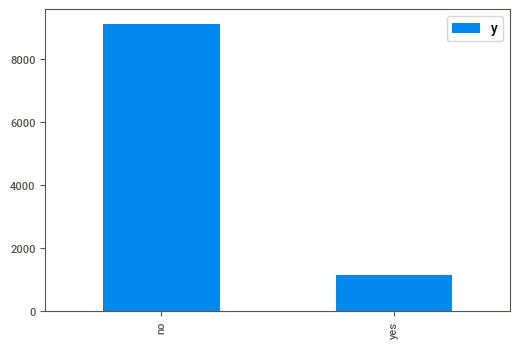

In [25]:
df.plot(kind="bar")

In [26]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000
mean,40.080606,261.388268,2.561134,963.609692,0.171506,0.077256,93.574206,-40.445780,3.621923,5166.850442
std,10.472190,263.722874,2.827084,184.098592,0.496992,1.576732,0.577502,4.622221,1.734170,72.492914
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,327.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,94.000000,3643.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Q 3. Write a user defined function to calculate the Inter quartile range for quantile values outside 25 to 75 range. And do the outlier capping for lower level with min value and for upper level with 'q3+1.5*iqr' value.

In [33]:
def remove_outlier(df_in, col_name):
    # Calculate quantile 1 using quantile(0.25)
    quartile1 = df_in[col_name].quantile(0.25)
    # Calculate quantile 3
    quartile3 = df_in[col_name].quantile(3/4)
    # Calculate IQR as difference of Quantile 3 and quantile 1
    iqr = quartile3 - quartile1
    
    # Find the lower bound using the min() function
    lower_limit = df_in[col_name].min()
    # Find the upper bound as quantile3 + 1.5*IQR
    upper_limit = quartile3 + 1.5*iqr
    
    # Print the lower and upper bound of the column
    # print(col_name, "\t|\tupper-limit\t|\t", upper_limit, "\t|\tlower-limit\t|\t", lower_limit)
    # Remove the values lying outside min and upper bound range
    df_out = df_in[df_in[col_name] < upper_limit]
    return df_out

In [36]:
def outlier_metric(df_in, col_name):
    # Calculate quantile 1 using quantile(0.25)
    quartile1 = df_in[col_name].quantile(0.25)
    # Calculate quantile 3
    quartile3 = df_in[col_name].quantile(3/4)
    # Calculate IQR as difference of Quantile 3 and quantile 1
    iqr = quartile3 - quartile1
    
    # Find the lower bound using the min() function
    lower_limit = df_in[col_name].min()
    # Find the upper bound as quantile3 + 1.5*IQR
    upper_limit = quartile3 + 1.5*iqr
    
    limits = [lower_limit, upper_limit]
    return limits

In [34]:
for num_col in num_cols:
    result = remove_outlier(bank, num_col)
    print("------",num_col,"----------")
    print(result.head())
    

------ age ----------
   age          job  marital          education  default housing loan  \
0   46  blue-collar  married           basic.9y       no      no  yes   
1   29       admin.   single  university.degree       no      no   no   
2   50   management  married  university.degree       no     yes  yes   
3   31       admin.  married        high.school  unknown     yes   no   
4   32       admin.   single        high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         tue  ...         3    999         0  nonexistent   
1   cellular   may         wed  ...         2    999         0  nonexistent   
2   cellular   apr         fri  ...         1    999         0  nonexistent   
3  telephone   may         thu  ...         2    999         0  nonexistent   
4   cellular   jun         tue  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.emp

In [39]:
for num_col in num_cols:
    result = outlier_metric(bank, num_col)
    print("------",num_col,"----------")
    print(result)
    

------ age ----------
[18, 69.5]
------ duration ----------
[0, 663.0]
------ campaign ----------
[1, 6.0]
------ pdays ----------
[0, 999.0]
------ previous ----------
[0, 0.0]
------ emp.var.rate ----------
[-3.4, 6.200000000000001]
------ cons.price.idx ----------
[92.201, 95.3725]
------ cons.conf.idx ----------
[-50.8, -26.949999999999992]
------ euribor3m ----------
[0.634, 10.3865]
------ nr.employed ----------
[4963.6, 5421.6]


In [29]:
df1 = bank[(bank.age > 18) & (bank.age < 69.5)]
df1.age.count()

10170

In [30]:
df1 = df1[(df1.duration < 663 )]
df1.age.count()

9472

In [103]:
from sklearn.pipeline import make_pipeline

In [ ]:
est = make_pipeline(StandardScaler(), SGDClassifier())

### Q 3.1 Using the above created function , remove the outlier from 'age' variables:

In [35]:
df_age = remove_outlier(bank,"age")
df_age.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,29,admin.,single,university.degree,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
2,50,management,married,university.degree,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,31,admin.,married,high.school,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4,32,admin.,single,high.school,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


In [44]:
limits = outlier_metric(bank,"age")
bank[(bank.age < limits[1])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,29,admin.,single,university.degree,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
2,50,management,married,university.degree,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,31,admin.,married,high.school,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4,32,admin.,single,high.school,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,38,admin.,married,university.degree,no,no,no,cellular,nov,thu,...,1,7,4,failure,-3.4,92.649,-30.1,0.714,5017.5,yes
10293,34,self-employed,married,university.degree,no,no,no,cellular,oct,wed,...,1,5,3,failure,-3.4,92.431,-26.9,0.740,5017.5,yes
10294,52,blue-collar,married,professional.course,unknown,yes,no,cellular,nov,wed,...,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
10295,35,technician,married,university.degree,no,yes,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [43]:
limits = outlier_metric(bank,"age")
limits_campaign = outlier_metric(bank,"campaign")
bank[(bank.age < limits[1]) & (bank.campaign < limits_campaign[1])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,29,admin.,single,university.degree,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
2,50,management,married,university.degree,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,31,admin.,married,high.school,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4,32,admin.,single,high.school,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,58,technician,married,high.school,no,no,no,telephone,jun,thu,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
10292,38,admin.,married,university.degree,no,no,no,cellular,nov,thu,...,1,7,4,failure,-3.4,92.649,-30.1,0.714,5017.5,yes
10293,34,self-employed,married,university.degree,no,no,no,cellular,oct,wed,...,1,5,3,failure,-3.4,92.431,-26.9,0.740,5017.5,yes
10294,52,blue-collar,married,professional.course,unknown,yes,no,cellular,nov,wed,...,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no


### Q 3.2 Using the above created function , remove the outlier from 'campaign' variables:

In [ ]:
def log(bank):
    # your code to remove the outlier from campaign
bank = log(bank) 

### Q 3.3 Using the above created function , remove the outlier from 'duration' variables:

In [ ]:
def log(bank):
    # your code to remove the outlier from duration
bank = log(bank) 

### Dividing dataset into two, on the basis of categorical and numerical.

In [ ]:
bank_cat=bank[['job', 'marital','default', 'education', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y']]

In [46]:
bank_cat = bank[cat_cols]
bank_cat.head()

,day_of_week,education,housing,poutcome,contact,month,default,y,job,loan,marital
0,tue,basic.9y,no,nonexistent,telephone,may,no,no,blue-collar,yes,married
1,wed,university.degree,no,nonexistent,cellular,may,no,no,admin.,no,single
2,fri,university.degree,yes,nonexistent,cellular,apr,no,no,management,yes,married
3,thu,high.school,yes,nonexistent,telephone,may,unknown,no,admin.,no,married
4,tue,high.school,yes,nonexistent,cellular,jun,no,yes,admin.,no,single


In [47]:
bank_cont = bank.drop(['job', 'marital','default', 'education', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], axis=1)
bank_cont.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,46,329,3,999,0,1.1,93.994,-36.4,4.857,5191.0
1,29,132,2,999,0,-1.8,92.893,-46.2,1.281,5099.1
2,50,206,1,999,0,-1.8,93.075,-47.1,1.405,5099.1
3,31,199,2,999,0,1.1,93.994,-36.4,4.860,5191.0
4,32,350,1,999,0,-2.9,92.963,-40.8,1.262,5076.2


In [48]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,29,admin.,single,university.degree,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
2,50,management,married,university.degree,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,31,admin.,married,high.school,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4,32,admin.,single,high.school,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


### Q 4. Label encode the below mentioned categorical variable to numerical values.
``` ['job', 'marital','default','education', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] ```

In [50]:
bank_cat.head()

,day_of_week,education,housing,poutcome,contact,month,default,y,job,loan,marital
0,tue,basic.9y,no,nonexistent,telephone,may,no,no,blue-collar,yes,married
1,wed,university.degree,no,nonexistent,cellular,may,no,no,admin.,no,single
2,fri,university.degree,yes,nonexistent,cellular,apr,no,no,management,yes,married
3,thu,high.school,yes,nonexistent,telephone,may,unknown,no,admin.,no,married
4,tue,high.school,yes,nonexistent,cellular,jun,no,yes,admin.,no,single


In [53]:
from sklearn.preprocessing import LabelEncoder

encoding = LabelEncoder();

encoded_cat_df = bank_cat.apply(encoding.fit_transform)

encoded_cat_df.head()

,day_of_week,education,housing,poutcome,contact,month,default,y,job,loan,marital
0,3,2,0,1,1,6,0,0,1,2,1
1,4,6,0,1,0,6,0,0,0,0,2
2,0,6,2,1,0,0,0,0,4,2,1
3,2,3,2,1,1,6,1,0,0,0,1
4,3,3,2,1,0,4,0,1,0,0,2


### Combining the numerical and categorical dataset.

In [ ]:
bank_final= pd.concat([bank_cont, bank_cat], axis = 1)

### Q 6. Extract independent column to prepare X 

In [ ]:
X = pd.DataFrame()
def log():
    # write your code to create a dataframe of dependent variables excluding 'y' variable
    return X
X = log()

### Q 7. Extract dependent variable into a dataframe 'y' for model predcition

In [ ]:
y = pd.DataFrame()
def log():
    # write your code to create a dataframe which consists only of dependepent variable
    return y
y = log()

### Q 8. Splitting X and y intro train and test dataset

In [ ]:
from sklearn.cross_validation import train_test_split
def log():
    return # train test split using train_test_split of 75:25 and random state=1
X_train, X_test, y_train, y_test = log()

### Check the shape of X an y of train dataset.

In [ ]:
def log():
    print(X_train.shape)
    print(y_train.shape)
log()

### Check the shape of X and y of test dataset.

In [ ]:
def log():
    print(X_test.shape)
    print(y_test.shape)
log()

### Q 9. Instantitate Logistic Regression model using scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
def log():
    # initiate the logistic regression model to new variable logreg
    return logreg
logreg = log()

### Q 10. Fit the logistic model on X_train and y_train

In [ ]:
def log():
    # fit the X_train and y_train
    # We don't expect any return from your side.
log()    

### Q 11. Using the model for prediction

In [ ]:
y_pred_train = pd.DataFrame()
def log():
    # create the model prediction on X_train data using the above created dataframe
    return y_pred_train
y_pred_train = log()

In [ ]:
y_pred_test = pd.DataFrame()
def log():
    # create the model prediction on X_test data using the above created dataframe
    return y_pred_test
y_pred_test = log()

### Q 12. Model evaluation using accuracy classification score

In [ ]:
from sklearn.metrics import accuracy_score
def log():
    #Calculate and print the accuracy score
log()

### Q 13. Model evaluation using Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
def log():
    # provide confusion matrix index name as['Actual No_Deposit','Actual Deposit']
    # provide confusion matrix index name as['Predicted No_Deposit','Predicted Deposit']
    print(confusion_matrix)
log()

### Q 14. Accuracy prediction setting the threshold = 0.75

In [ ]:
import numpy as np
def log():
    # Calculate preds1 keeping the probabilty value as 0.75
    # calculate and print the accuracy using the above mentioned threshold probability
log()

### Q 15. Accuracy prediction setting the threshold = 0.25

In [ ]:
def log():
    # Calculate preds2 keeping the probabilty value as 0.25
    # calculate and print the accuracy using the above mentioned threshold probability
log()